In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('2023-8-12_Katarina_CCCV_formation_C5D5_Cell229_Channel_32_Wb_1.csv')

data.head()

Data_Point                Date_Time  Test_Time(s)  Step_Time(s)  \
0           1  08/12/2023 13:08:37.938        10.001        10.001   
1           2  08/12/2023 13:08:47.937        20.000        20.000   
2           3  08/12/2023 13:08:57.938        30.002        30.002   
3           4  08/12/2023 13:09:07.938        40.001        40.001   
4           5  08/12/2023 13:09:17.937        50.000        50.000   

   Cycle_Index  Step_Index  TC_Counter1  TC_Counter2  Current(A)  Voltage(V)  \
0            1           1          0.0          0.0     0.00007      1.8301   
1            1           1          0.0          0.0     0.00007      1.9839   
2            1           1          0.0          0.0     0.00007      2.0173   
3            1           1          0.0          0.0     0.00007      2.0187   
4            1           1          0.0          0.0     0.00007      2.0147   

   Power(W)  Charge_Capacity(Ah)  Discharge_Capacity(Ah)  Charge_Energy(Wh)  \
0   0.00013                  0.0                     0.0                0.0   
1   0.00014                  0.0                     0.0                0.0   
2   0.00014                  0.0                     0.0                0.0   
3   0.00014                  0.0                     0.0                0.0   
4   0.00014                  0.0                     0.0                0.0   

   Discharge_Energy(Wh)  ACR(Ohm)  dV/dt(V/s)  Internal_Resistance(Ohm)  \
0                   0.0       NaN    0.027215                       NaN   
1                   0.0       NaN    0.007904                       NaN   
2                   0.0       NaN    0.001261                       NaN   
3                   0.0       NaN    0.000213                       NaN   
4                   0.0       NaN   -0.000456                       NaN   

    dQ/dV(Ah/V)  dV/dQ(V/Ah)  
0  7.093400e-07    1436400.0  
1  2.410800e-06     490090.0  
2  7.767700e-06     122940.0  
3  1.516700e-05          NaN  
4           NaN          NaN

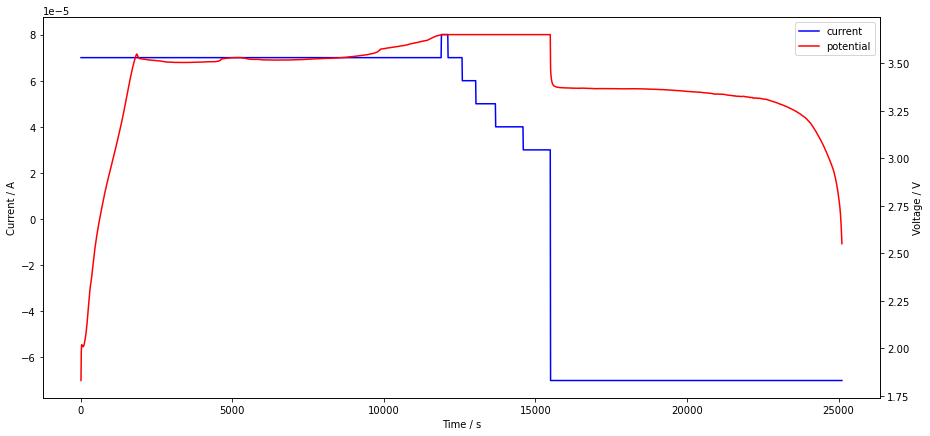

In [3]:
plt.rcParams['figure.figsize'] = [15, 7]

fig, ax1 = plt.subplots()

ax1.plot(data['Test_Time(s)'], data['Current(A)'], '-b', label='current')
ax1.set_xlabel('Time / s')
ax1.set_ylabel('Current / A')

ax2 = ax1.twinx()
ax2.plot(data['Test_Time(s)'], data['Voltage(V)'], '-r', label='potential')
ax2.set_ylabel('Voltage / V')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()

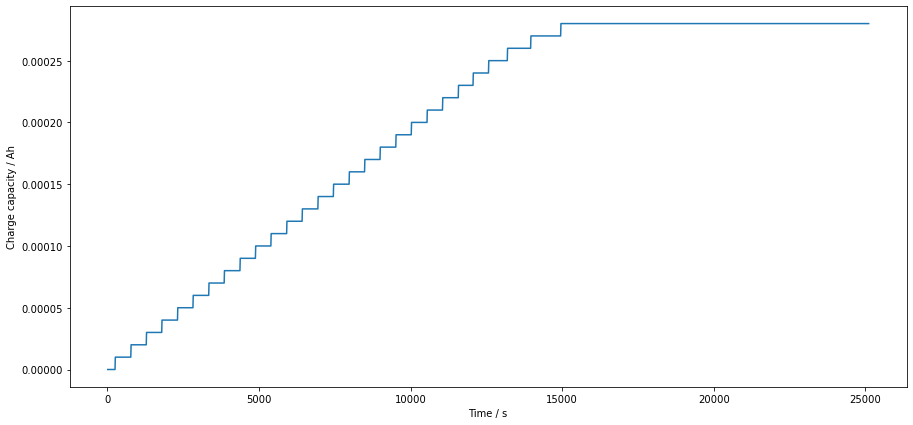

In [4]:
plt.plot(data['Test_Time(s)'], data['Charge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Charge capacity / Ah')

plt.show()

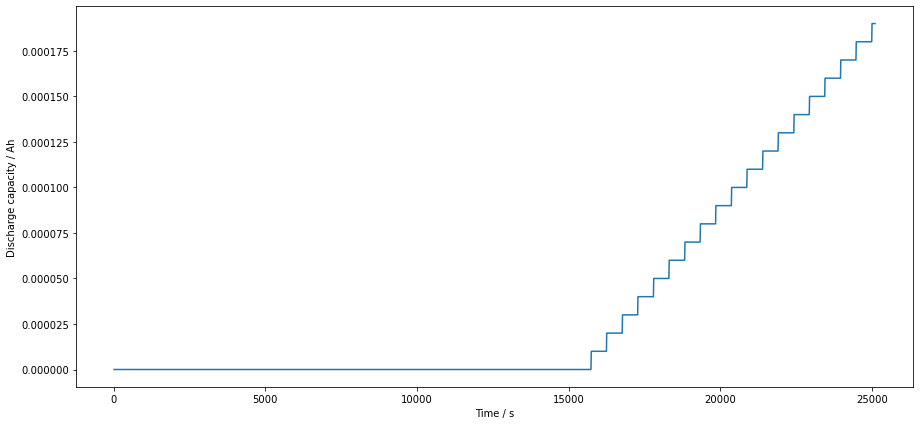

In [5]:
plt.plot(data['Test_Time(s)'], data['Discharge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Discharge capacity / Ah')

plt.show()

In [8]:
current = list(data['Current(A)'])
time = list(data['Test_Time(s)'])
step = list(data['Step_Index'])

charge_current=[]
charge_time=[]
discharge_current=[]
discharge_time=[]

for i in range(len(current)):
    if step[i]==1 or step[i]==2:
        charge_current.append(current[i])
        charge_time.append(time[i])
    elif step[i]==3:
        discharge_current.append(current[i])
        discharge_time.append(time[i])

print(len(charge_time))
print(len(charge_current))
print(len(discharge_time))
print(len(discharge_current))

1550
1550
962
962


In [10]:
# charge and discharge capacity calculation

C=np.trapz(x=charge_time, y=charge_current)
C=C*1000/3600
print(f'Charge capacity: {round(C, 2)} mAh.')

D=np.trapz(x=discharge_time, y=discharge_current)
D=D*1000/3600
print(f'Discharge capacity: {round(D, 2)} mAh.')

Charge capacity: 0.28 mAh.
Discharge capacity: -0.19 mAh.
